In [1]:
import pandas as pd
import csv
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import namedtuple
CSV = namedtuple("CSV", ["header", "index", "data"])

/u/deu9yh/.conda/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# data = pd.read_csv('age_gender.csv')
data = pd.read_fwf('celeba/list_attr_celeba.txt')

In [3]:
def load_csv(
        filename: str,
        header = None,
    ) -> CSV:
        with open(filename) as csv_file:
            data = list(csv.reader(csv_file, delimiter=" ", skipinitialspace=True))

        if header is not None:
            headers = data[header]
            data = data[header + 1 :]
        else:
            headers = []

        indices = [row[0] for row in data]
        data = [row[1:] for row in data]
        data_int = [list(map(int, i)) for i in data]

        return CSV(headers, indices, torch.tensor(data_int))

In [25]:
attr = load_csv("celeba/list_attr_celeba.txt", header=1)
# print(attr.header)
# print(attr.header.index('Smiling'))
smile = attr.data[:, 31]
n_smile = smile.unique(return_counts=True)[1][1]
no_smile = smile.unique(return_counts=True)[1][0]
print(n_smile/len(smile), no_smile/len(smile))

tensor(0.4821) tensor(0.5179)


In [3]:
data.head(10)

,202599,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...,Big_Lips Big_Nose Black_Hair Blond_Hair Blurry...,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...,-1 1 -1 -1 1 -1 -1 1 -1 -1 -1 1 1 -1 1 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...,-1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...,1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 -1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...,-1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 1 -1 1 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,000005.jpg -1 1 1 -1 -1 -1 1 -1 -1 -1 -1 -1...,-1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,000006.jpg -1 1 1 -1 -1 -1 1 -1 -1 -1 -1 1...,-1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 1 1 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,000007.jpg 1 -1 1 1 -1 -1 1 1 1 -1 -1 -1 ...,1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 1 -1 -1 -1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,000008.jpg 1 1 -1 1 -1 -1 1 -1 1 -1 -1 -1 ...,1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,000009.jpg -1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1...,-1 1 -1 -1 1 1 -1 1 -1 1 -1 1 -1 -1 1 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ethnicity_count = data['ethnicity'].value_counts()
# print(ethnicity_count)
age_30 = data[data['age'] < 30]
# print(age_30)
data_white_30 = age_30[age_30['ethnicity'] == 0 ]
data_black_30 = age_30[age_30['ethnicity'] == 1 ]
data_asian_30 = age_30[age_30['ethnicity'] == 2 ]
data_indian_30 = age_30[age_30['ethnicity'] == 3 ]
data_others_30 = age_30[age_30['ethnicity'] == 4 ]

print(f'Total images of ethnicity White: {ethnicity_count[0]}')
print(f'Total images of ethnicity Black: {ethnicity_count[1]}')
print(f'Total images of ethnicity Asian: {ethnicity_count[2]}')
print(f'Total images of ethnicity Indian: {ethnicity_count[3]}')
print(f'Total images of ethnicity Others: {ethnicity_count[4]}')
print(f'Total images of people with Age < 30 and ethnicity = White: {len(data_white_30)} ({len(data_white_30) * 100/len(data):.2f}%)')
print(f'Total images of people with Age < 30 and ethnicity = Black: {len(data_black_30)} ({len(data_black_30) * 100/len(data):.2f}%)')
print(f'Total images of people with Age < 30 and ethnicity = Asian: {len(data_asian_30)} ({len(data_asian_30) * 100/len(data):.2f}%)')
print(f'Total images of people with Age < 30 and ethnicity = Indian: {len(data_indian_30)} ({len(data_indian_30) * 100/len(data):.2f}%)')
print(f'Total images of people with Age < 30 and ethnicity = Others: {len(data_others_30)} ({len(data_others_30) * 100/len(data):.2f}%)')

Total images of ethnicity White: 10078
Total images of ethnicity Black: 4526
Total images of ethnicity Asian: 3434
Total images of ethnicity Indian: 3975
Total images of ethnicity Others: 1692
Total images of people with Age < 30 and ethnicity = White: 4035 (17.02%)
Total images of people with Age < 30 and ethnicity = Black: 2194 (9.26%)
Total images of people with Age < 30 and ethnicity = Asian: 2354 (9.93%)
Total images of people with Age < 30 and ethnicity = Indian: 2137 (9.01%)
Total images of people with Age < 30 and ethnicity = Others: 1217 (5.13%)


Text(0, 0.5, 'count')

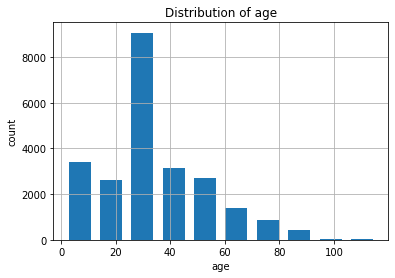

In [25]:
data['age'].hist(rwidth=0.7)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')

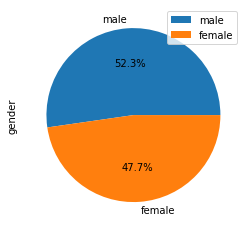

In [26]:
data['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.legend()

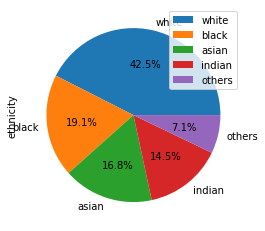

In [27]:
data['ethnicity'].value_counts().plot.pie(autopct="%1.1f%%", labels=['white', 'black', 'asian', 'indian', 'others'])
plt.legend()